<a href="https://colab.research.google.com/github/bc1414/Machine-Learning-Notes/blob/main/Bayesian-Inference-on-Grapn(Kronfit).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn.parameter import Parameter
from numpy import linalg as LA


In [ ]:
def kronecker_mat(P0,k):
  '''
  Generate a stochastic Kronecker matrix from an initial matrix.
  ----------------------
  Input:
  P0(np.matrix/pytorch tensor)  : Initial matrix of the Kronecker graph.
  k(int)              : k-th order graph we want to get(also known as )
  ----------------------
  Output:
  P^{k}（torch tensor）: k-th order kronecker graph matrix
  '''
  Pi=P0
  for i in range(k-1):
   Pi= np.kron(Pi, P0)
  return Pi

In [ ]:
Pk=kronecker_mat(a,4)

In [ ]:
import networkx as nx

In [ ]:
N = 16 #number of nodes in networkx
kave = 6 #expected number of partners
print('generating graph G with {} nodes'.format(N))
print('The average degree of nodes is {}'.format(kave))
G = nx.fast_gnp_random_graph(N, kave/(N-1)) #Erdo’’s-Re’nyi graph
A=nx.adj_matrix(G).todense()
A=np.asarray(A)

generating graph G with 16 nodes
The average degree of nodes is 6


In [ ]:
def likehihod(A,Pk):
  NLL=np.sum((1-A)*np.log(1-Pk) +A*np.log(Pk))
  return NLL

def effeicient_way_ll(A,Pk):
  "which I think it is not efficient"
  Empty_graph_ll=np.sum(np.log(1-Pk))
  ll_graph= Empty_graph_ll+np.sum(A*np.log(Pk)-A*np.log((1-Pk)))
  return ll_graph



def metropolis_update_ratio(sigma_before,sigma_later,Pk):
  '''
  if memory is sufficinet, this one is much cleaner to execute
  '''
  Nll_before=(1-sigma_before)*np.log(1-Pk) +sigma_before*np.log(Pk)
  Nll_later=(1-sigma_later)*np.log(1-Pk) +sigma_later*np.log(Pk)
  ratio=np.exp(np.sum(Nll_later-Nll_before))
  return ratio

def SwapElement(sigma_before,i,j):
  i_topology=sigma_before[i,:]
  j_topology=sigma_before[j,:]
  sigma_later=np.copy(sigma_before)
  sigma_later[i,:]=j_topology
  sigma_later[j,:]=i_topology
  sigma_later[:,i]=sigma_before[:,j]
  sigma_later[:,j]=sigma_before[:,i]
  sigma_later[i,j]=sigma_before[i,j]
  sigma_later[j,i]=sigma_before[j,i]
  sigma_later[i,i]=sigma_before[j,j]
  sigma_later[j,j]=sigma_before[i,i]
  return sigma_later

In [ ]:
A1=SwapElement(A,0,5)
print(b)

[[0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1]
 [0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 0]
 [0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1]
 [1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 0]
 [0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 1]
 [0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 1]
 [0 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0]
 [1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0]
 [0 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0]
 [1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0]
 [0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0]
 [0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 1]
 [0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 1]
 [1 1 1 1 0 0 1 1 1 0 1 0 0 0 1 0]
 [0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0]
 [1 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0]]
[[0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0]
 [0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0]
 [1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1]
 [0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 1]
 [0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1]
 [0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1]
 [0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 1]
 [1 1 1 1 0 1 0 0 0 1 0 0 1 0 0 1]
 [1 0 0 0 1 0 1 0 0

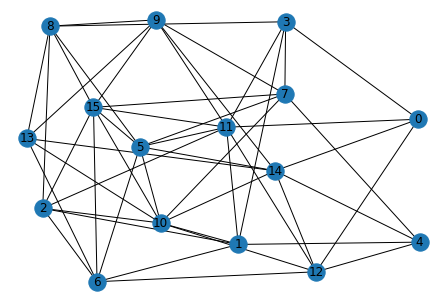

In [ ]:
nx.draw(G,with_labels=True)

In [ ]:
G2=nx.Graph()
G2 = nx.fast_gnp_random_graph(5, 2/(4-1)) #Erdo’’s-Re’nyi graph

## Visual unit test for swap element

[[0 1 1 1 1]
 [1 0 1 0 1]
 [1 1 0 1 1]
 [1 0 1 0 1]
 [1 1 1 1 0]]


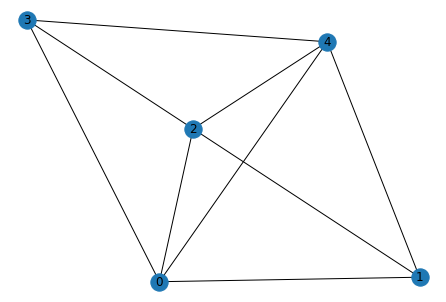

In [ ]:

A2=nx.adj_matrix(G2).todense()
A2=np.asarray(A2)
nx.draw(G2,with_labels=True)
A3=SwapElement(A2,1,4)
G3=nx.from_numpy_array(A3)



In [ ]:
def Gradient_descent_methods(P,A,n,a):
  theta_history

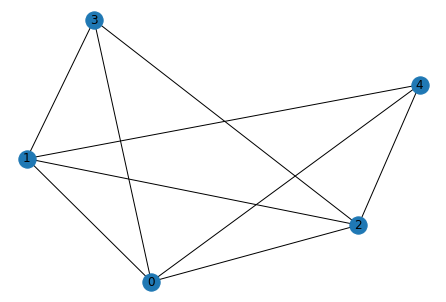

In [ ]:
nx.draw(G3,with_labels=True)

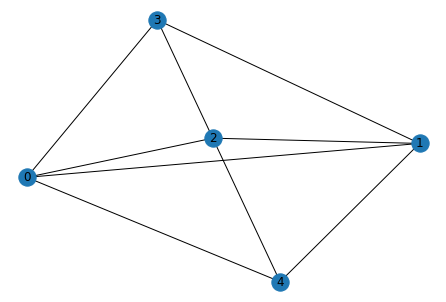

In [ ]:
nx.draw(G3,with_labels=True)

In [ ]:
def SamplePermutation(Pk,sigma,N_steps):
  Node_list=np.arange(len(Pk))
  element_to_swap=np.random.choice(a=Node_list,size=(2,N_steps))
  mask=element_to_swap[1,:]!=element_to_swap[0,:]# it is pointless to swap the same element
  first_element=element_to_swap[0,:][mask]
  second_element=element_to_swap[1,:][mask]
  U=np.random.rand(N_steps)
  for idx in range(len(first_element)):
    sigma_later=SwapElement(sigma,first_element[idx],second_element[idx])
    ratio=metropolis_update_ratio(sigma,sigma_later,Pk)
    if U[idx]<ratio:
      sigma=sigma_later
      print('new state updated')
  return sigma


Node_list=np.arange(len(Pk))
element_to_swap=
mask=element_to_swap[1,:]!=element_to_swap[0,:]# it is pointless to swap the same element




def SamplePermutation(Pk,sigma,Node_list,u,n1_swap,n2_swap):
    sigma_later=SwapElement(sigma,n1_swap, n2_swap)
    ratio=metropolis_update_ratio(sigma,sigma_later,Pk)
    if u<ratio:
      sigma=sigma_later
  return sigma

def SampleZ(H,Pk,label_non_obs,u):
  mat_size=len(Pk)
  edge_in_non_obs=H>0*label_non_obs
  edge_position=np.where(edge_in_non_obs)
  edge_removed=np.random.randint(len(edge_position[0]))
  px=Pk[edge_position[0][edge_removed],edge_position[1][edge_removed]]
  non_edge_in_non_obs=H<1*label_non_obs
  py_array=non_edge_in_non_obs*Pk
  py_array=np.ravel(py_array)
  idx=np.arange(len(py_array),dtype=int)
  py=np.random.choice(idx, size=1, p=py_array)
  ratio=(1-py_array[py])/(1-px)
  if ratio<u:
    H[py//mat_size,py%mat_size]=1
    H[edge_position[0][edge_removed],edge_position[1][edge_removed]]=0
  return H




In [ ]:
import numpy as np
a=np.ones((2,5))
b=np.zeros((2,5))
c=np.random.rand(2,5)
print(c)
b==1
d=c>0.5
e=np.where(d)[0][1]
print(len(d))

print(np.random.multinomial(100, [1.0 / 3, 2.0 / 3,0]) ) # RIGHT
int(1)//int(7)

[[0.75344409 0.2370347  0.84074292 0.94885577 0.38571266]
 [0.953736   0.10542435 0.87088774 0.29578875 0.03729941]]
2
[25 75  0]


0

Debuging sector(not used thing)

In [ ]:
def metropolis_step(sigma,Pk,i,j):
  '''
  this saves memory especially for sparse matrixs
  '''
  sigma_have_link=np.sum(sigma[i,:]*np.log(Pk[i,:]))+np.sum(sigma[:,i]*np.log(Pk[:,i]))\
         +np.sum(sigma[:,j]*np.log(Pk[:,j]))+ np.sum(sigma[j,:]*np.log(Pk[j,:]))-np.log(Pk[i,i])*sigma[i,i]-np.log(Pk[j,j])*sigma[j,j]
  sigma_no_link=np.sum((1-sigma[i,:])*np.log(1-Pk[i,:]))+np.sum((1-sigma[:,i])*np.log(1-Pk[:,i]))\
         +np.sum((1-sigma[:,j])*np.log(1-Pk[:,j]))+ np.sum((1-sigma[j,:])*(1-np.log(Pk[j,:])))-np.log(1-Pk[i,i])*(1-sigma[i,i])-np.log(1-Pk[j,j])*sigma[j,j]
  proposed_weight=sigma_have_link+sigma_no_link
  return proposed_weight


In [ ]:

def SamplePermutation(Pk,sigma,Node_list,u,n1_swap,n2_swap):
    sigma_later=SwapElement(sigma,n1_swap, n2_swap)
    ratio=metropolis_update_ratio(sigma,sigma_later,Pk)
    if u<ratio:
      sigma=sigma_later
  return sigma

def SampleZ(H,Pk,label_non_obs,u):
  mat_size=len(Pk)
  edge_in_non_obs=H>0*label_non_obs
  print(edge_in_non_obs)
  edge_position=np.where(edge_in_non_obs)
  print(edge_in_non_obs)
  edge_removed=np.random.randint(len(edge_position[0]))
  print(edge_removed)
  px=Pk[edge_position[0][edge_removed],edge_position[1][edge_removed]]
  print(px)
  non_edge_in_non_obs=H<1*label_non_obs
  print(non_edge_in_non_obs)
  py_array=non_edge_in_non_obs*Pk
  py_array=np.ravel(py_array)
  idx=np.arange(len(py_array),dtype=int)
  py=np.random.choice(idx, size=1, p=py_array)
  print(py)
  ratio=(1-py_array[py])/(1-px)
  print(ratio)
  if ratio<u:
    H[py//mat_size,py%mat_size]=1
    H[edge_position[0][edge_removed],edge_position[1][edge_removed]]=0
  return H


In [ ]:
# toy train data  generator
def kronecker(A,B):
    return torch.einsum("ab,cd->acbd", A, B).view(A.size(0)*B.size(0),  A.size(1)*B.size(1))

def partial_mask(sz,del_num):
    '''mask the known part and un know part'''
    kn_mask = torch.zeros(sz,sz)
    kn_mask[:-del_num,:-del_num] = 1

    un_mask=1-kn_mask

    return kn_mask,un_mask



p = torch.FloatTensor([[0.9,0.7],[0.5, 0.3]])
k = 4
ground_adj = p

# 删除0.25比例的节点 origin: we randomly removed 25% of the nodes and the corresponding edges.
sz = 2**4
remove_proportion = 0.25
del_num = int(sz*remove_proportion)

for i in range(k-1):
    ground_adj = kronecker(ground_adj,p)

Ground_truth_adj = (ground_adj>torch.rand((ground_adj.shape))).float()
sigma=Ground_truth_adj

kn_mask,un = partial_mask(sz,del_num)
known_adj =  kn_mask*Ground_truth_adj
un=un.numpy()
missing_edges = int((left_mask*Ground_truth_adj).sum())
print("missing edges num",missing_edges)

missing edges num 8


In [ ]:
H=SampleZ(,Pk,label_non_obs,u)

SyntaxError: ignored